<a href="https://colab.research.google.com/github/Karthikeyan-ganesan86/Dissertation/blob/main/07_DISSERTATION_Pairs_Trading_Analysis_of_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSIS OF VARIOUS STOCKS TO FIND THE STOCKS THAT ARE PAIRED

### CALCULATION OF VARIOUS METRICS TO COME UP WITH BUY AND SELL SIGNALS OF THESE STOCKS

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn

In [2]:
symbolsIds = ['SPY','AAPL','ADBE','LUV','MSFT',\
              'SKYW','QCOM',
                 'INTC','JNPR','AMD','IBM']

#symbolsIds = ['INTC','AMD']

In [3]:
import yfinance as yf
import numpy as np

In [4]:
prices_df = yf.download(symbolsIds, start="2020-01-01",end="2023-10-30")

[*********************100%%**********************]  11 of 11 completed


In [5]:
prices_df

Adj Close                                                                                                                           Close                                                                                                                            High                                                                                                                             Low                                                                                                                           Open                                                                                                                         Volume                                                                                                
                  AAPL        ADBE         AMD         IBM       INTC       JNPR        LUV        MSFT        QCOM       SKYW         SPY        AAPL        ADBE         AMD         IBM       INTC       JNPR        LUV        MSFT        QCOM       SKYW         SPY        AAPL        ADBE         AMD         IBM       INTC       JNPR        LUV        MSFT        QCOM       SKYW         SPY        AAPL        ADBE        AMD         IBM       INTC       JNPR        LUV        MSFT        QCOM       SKYW         SPY        AAPL        ADBE         AMD         IBM       INTC       JNPR        LUV        MSFT        QCOM       SKYW         SPY       AAPL     ADBE       AMD       IBM      INTC     JNPR       LUV      MSFT     QCOM    SKYW        SPY
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2020-01-02   73.152634  334.429993   49.099998  106.306778  54.385208  21.893494  53.467480  154.779526   80.949951  64.704865  306.295227   75.087502  334.429993   49.099998  129.464630  60.840000  24.709999  54.840000  160.619995   88.690002  65.040001  324.869995   75.150002  334.480011   49.250000  129.942642  60.970001  24.900000  54.869999  160.729996   89.809998  65.150002  324.890015   73.797501  329.170013  46.630001  128.843216  60.220001  24.540001  54.290001  158.330002   88.080002  64.290001  322.529999   74.059998  330.000000   46.860001  129.063095  60.240002  24.809999  54.380001  158.779999   89.050003  65.150002  323.540009  135480400  1990100  80331100   3293436  18056000  2876000   3713000  22622100  8413900  349600   59151200
2020-01-03   72.441460  331.809998   48.599998  105.458946  53.723721  21.565666  52.989738  152.852234   79.425690  63.690117  303.975952   74.357498  331.809998   48.599998  128.432129  60.099998  24.340000  54.349998  158.619995   87.019997  64.019997  322.410004   75.144997  332.980011   49.389999  128.929260  60.700001  24.510000  54.419998  159.949997   87.639999  64.250000  323.640015   74.125000  328.690002  47.540001  127.686424  59.810001  24.170000  53.040001  158.059998   86.440002  62.060001  321.100006   74.287498  329.170013   48.029999  127.695984  59.810001  24.260000  53.599998  158.320007   87.260002  64.180000  321.160004  146322800  1577600  73127400   2482890  15293900  3041800   3536100  21116200  8340300  246900   77709700
2020-01-06   73.018677  333.709991   48.389999  105.270554  53.571762  21.521368  52.775246  153.247345   78.960205  63.769707  305.135620   74.949997  333.709991   48.389999  128.202682  59.930000  24.290001  54.130001  159.029

In [6]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
          result = coint(data[keys[i]], data[keys[j]])
          pvalue_matrix[i, j] = result[1]
          if result[1] > 0.95:
              pairs.append((keys[i], keys[j]))
              print(result)
    return pvalue_matrix, pairs

In [7]:
pvalues, pairs = find_cointegrated_pairs(prices_df['Adj Close'])
print(pairs)

(0.048704213624641196, 0.986969839362448, array([-3.90786074, -3.34248883, -3.04886167]))
[('LUV', 'SKYW')]


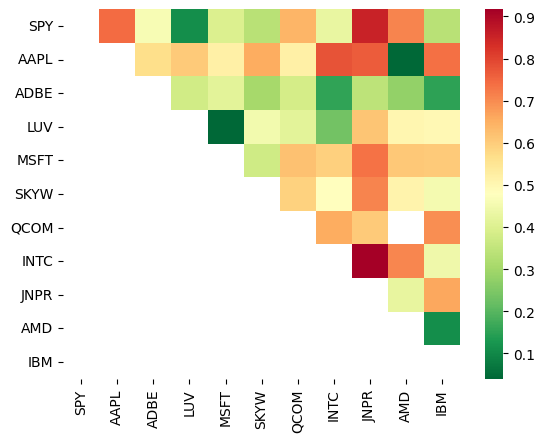

In [8]:
seaborn.heatmap(pvalues, xticklabels=symbolsIds,
                yticklabels=symbolsIds, cmap='RdYlGn_r',
                mask = (pvalues >= 0.98))
plt.show()

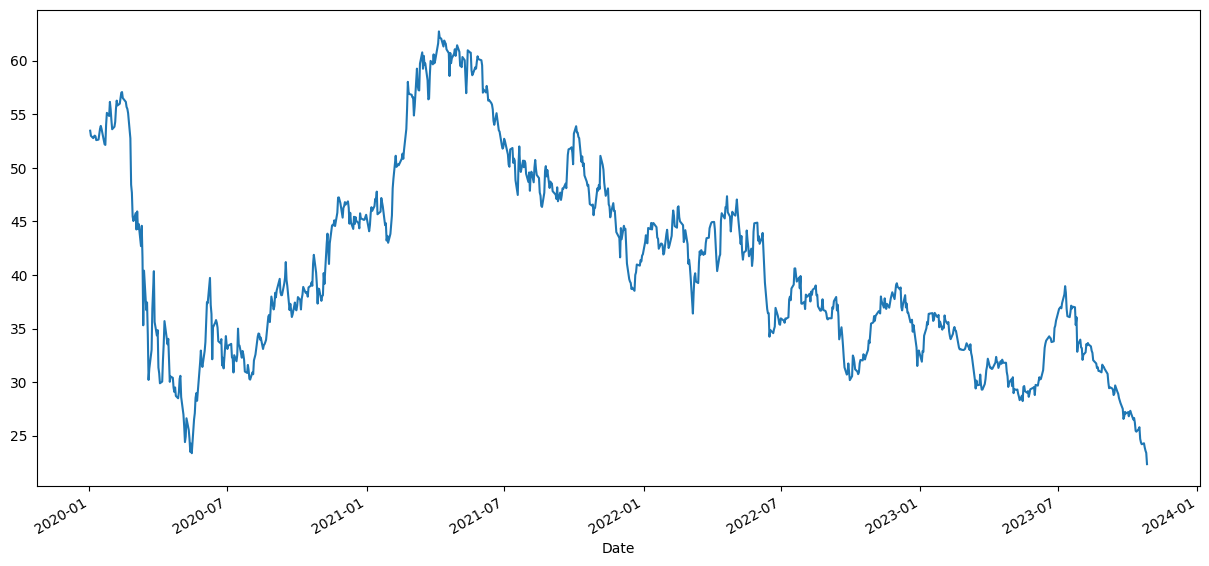

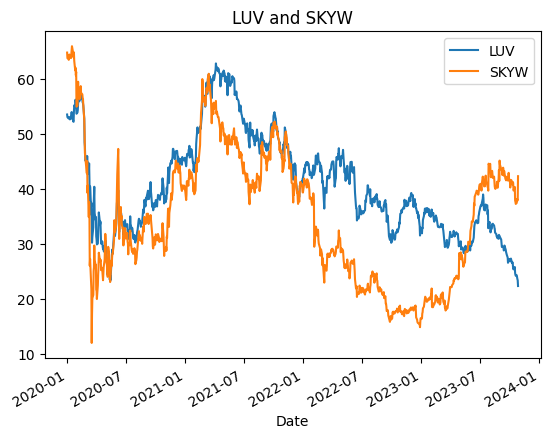

In [9]:
Symbol1_prices = prices_df['Adj Close']['LUV']
Symbol1_prices.plot(figsize=(15,7))
plt.show()
Symbol2_prices = prices_df['Adj Close']['SKYW']
Symbol2_prices.name = 'SKYW'
plt.title("LUV and SKYW")
Symbol1_prices.plot()
Symbol2_prices.plot()
plt.legend()
plt.show()

0.9869698453132953


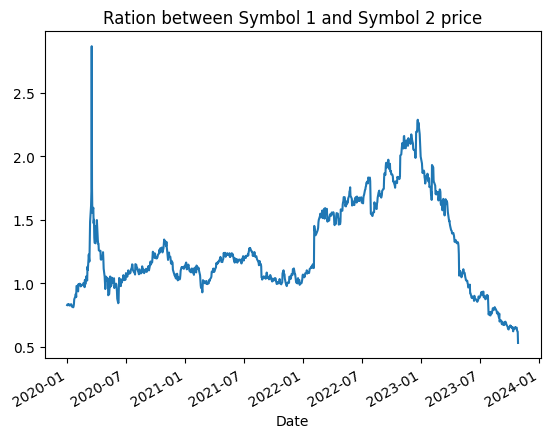

In [27]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print(pvalue)
ratios = Symbol1_prices / Symbol2_prices
plt.title("Ration between Symbol 1 and Symbol 2 price")

ratios.plot()
plt.show()

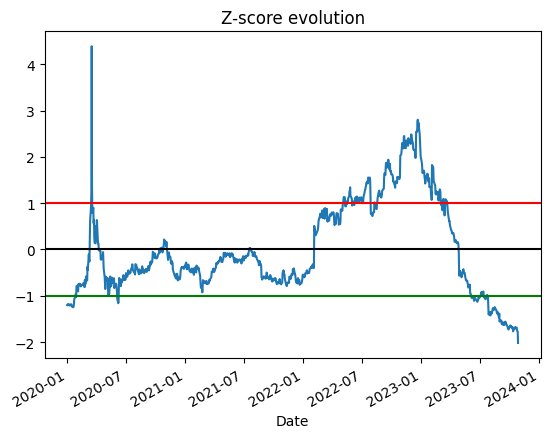

In [28]:
zscore(ratios).plot()
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()

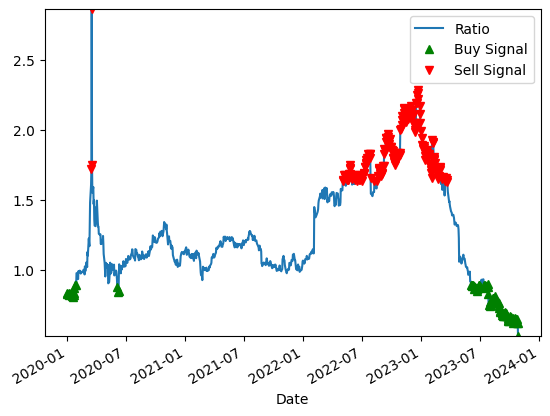

In [29]:
ratios.plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

In [30]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

<Axes: xlabel='Date'>

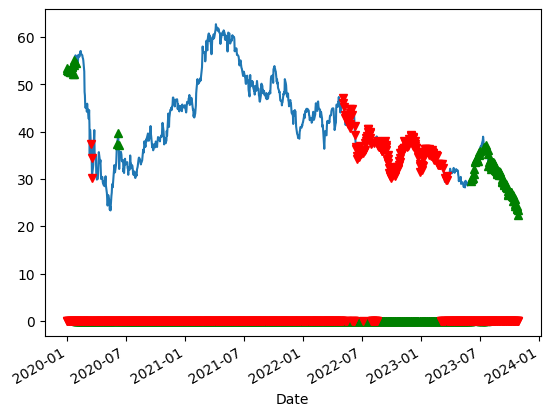

In [31]:
Symbol1_prices.plot()
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

In [32]:
pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))

In [33]:
position=0
for i in range(len(Symbol1_prices)):
    s1price=Symbol1_prices[i]
    s2price=Symbol2_prices[i]
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = 0

<Axes: xlabel='Date'>

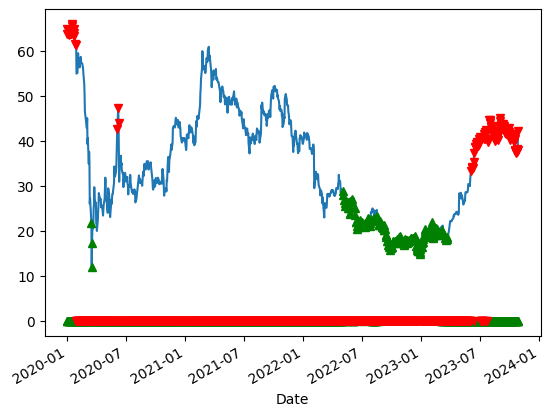

In [34]:
Symbol2_prices.plot()
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")

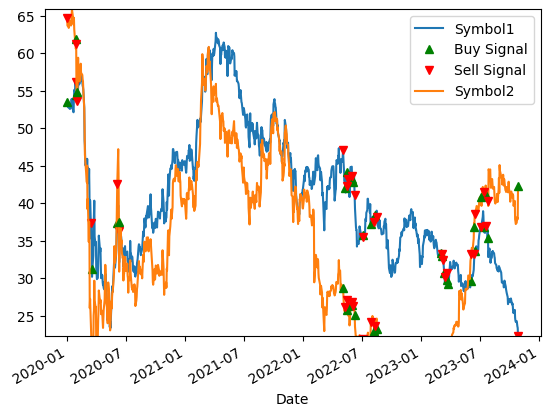

In [39]:
Symbol1_prices.plot()
pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
Symbol2_prices.plot()
pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()

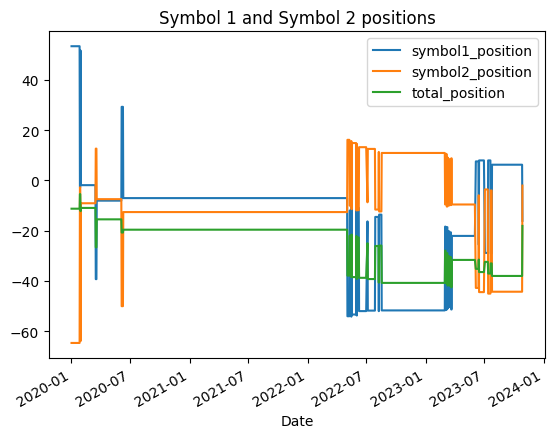

In [40]:
pair_correlation_trading_strategy['symbol1_buy'].head()


pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot()
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot()
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

In [41]:
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['delta']=np.zeros(len(Symbol1_prices))

In [42]:
position=0
s1_shares = 1000000
for i in range(len(Symbol1_prices)):
    s1positions= Symbol1_prices[i] * s1_shares
    s2positions= Symbol2_prices[i] * int(s1positions/Symbol2_prices[i])
    print(Symbol1_prices[i],Symbol2_prices[i])
    delta_position=s1positions-s2positions
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i]=delta_position
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i] = delta_position
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        position = 0

53.46747970581055 64.70486450195312
52.98973846435547 63.69011688232422
52.775245666503906 63.76970672607422
52.93124771118164 63.391666412353516
53.00924301147461 63.8791389465332
52.94099044799805 64.34671783447266
52.590003967285156 63.77965545654297
52.638755798339844 63.7597541809082
53.12623977661133 63.710018157958984
53.6527214050293 64.4561538696289
53.91596221923828 65.40125274658203
53.63322448730469 65.85888671875
52.200016021728516 64.51583862304688
52.14151382446289 63.829402923583984
54.013465881347656 64.74465942382812
55.134681701660156 63.21259307861328
54.842185974121094 61.48155975341797
56.15839767456055 61.959083557128906
55.4661750793457 60.58619689941406
54.432701110839844 61.212947845458984
53.603973388671875 54.885719299316406
53.83797073364258 55.06479263305664
54.28645706176758 57.47232437133789
55.5246696472168 59.41227722167969
56.2754020690918 56.77593231201172
55.82691192626953 56.8057746887207
55.982906341552734 56.26856231689453
56.480140686035156 57.0

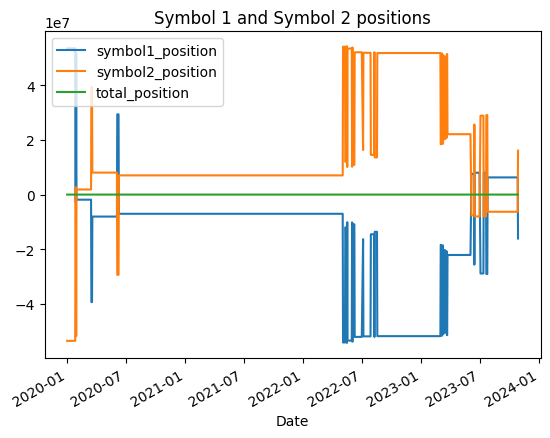

In [43]:
pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot()
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot()
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

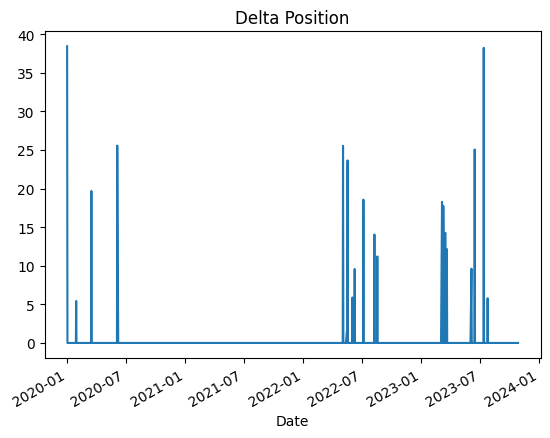

In [44]:
pair_correlation_trading_strategy['delta'].plot()
plt.title("Delta Position")
plt.show()